In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import RobustScaler
import json
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [34]:
csv_file_path= "/content/gdrive/MyDrive/cc_project/customer_churn.csv"

In [63]:
target = input("Please enter the value for Target variable name: ")

print("You entered:", target)

Please enter the value for Target variable name: Churn
You entered: Churn


In [37]:
def read_csv_with_encoding(csv_file_path, encoding='latin-1'):
        df = pd.read_csv(csv_file_path, encoding=encoding)
        return df

df = read_csv_with_encoding(csv_file_path)
print("Reading the CSV with Encoding : ")
df

Reading the CSV with Encoding : 


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0


In [38]:
def clean_column_names(df, replacement_char='_'):
    pattern = r'[^a-zA-Z0-9-_]+'
    cleaned_column_names = [re.sub(pattern, replacement_char, col) for col in df.columns]
    df.columns = cleaned_column_names
    return df

df = clean_column_names(df)
print("Reading the CSV with Cleaned column names : ")
df

Reading the CSV with Cleaned column names : 


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0


In [39]:
def read_and_get_first_5_rows(df):
        first_5_rows = df.head(5)
        return first_5_rows

first_5_rows = read_and_get_first_5_rows(df)
first_5_rows

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [40]:
def get_dataframe_length(df):
        length = len(df)
        return length

dataframe_length = get_dataframe_length(df)
print("Length of DataFrame:", dataframe_length)

Length of DataFrame: 900


In [41]:
def info(df):
        info_df = df.info()
        return info_df

dataframe_info = info(df)
print(dataframe_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB
None


In [42]:
def get_dataframe_description(df):
        description = df.describe()
        return description

description_output = get_dataframe_description(df)
print(description_output)

              Age  Total_Purchase  Account_Manager       Years   Num_Sites  \
count  900.000000      900.000000       900.000000  900.000000  900.000000   
mean    41.816667    10062.824033         0.481111    5.273156    8.587778   
std      6.127560     2408.644532         0.499921    1.274449    1.764836   
min     22.000000      100.000000         0.000000    1.000000    3.000000   
25%     38.000000     8497.122500         0.000000    4.450000    7.000000   
50%     42.000000    10045.870000         0.000000    5.215000    8.000000   
75%     46.000000    11760.105000         1.000000    6.110000   10.000000   
max     65.000000    18026.010000         1.000000    9.150000   14.000000   

            Churn  
count  900.000000  
mean     0.166667  
std      0.372885  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  


In [43]:
def get_categorical_description(df):
        categorical_description = df.describe(include="object")
        return categorical_description

categorical_description_output = get_categorical_description(df)
print(categorical_description_output)

                Names         Onboard_date  \
count             900                  900   
unique            899                  900   
top     Jennifer Wood  2013-08-30 07:00:40   
freq                2                    1   

                                             Location         Company  
count                                             900             900  
unique                                            900             873  
top     10265 Elizabeth Mission Barkerburgh, AK 89518  Anderson Group  
freq                                                1               4  


In [44]:
def get_categorical_and_quantitative_columns(df):
        categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
        quantitative_columns = df.select_dtypes(exclude=['object']).columns.tolist()
        return categorical_columns, quantitative_columns

categorical_cols, quantitative_cols = get_categorical_and_quantitative_columns(df)

print("Categorical Columns:", categorical_cols)
print("Quantitative Columns:", quantitative_cols)

Categorical Columns: ['Names', 'Onboard_date', 'Location', 'Company']
Quantitative Columns: ['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites', 'Churn']


In [45]:
def remove_duplicate_rows(df):
        df.drop_duplicates(keep='first', inplace=True)
        return df

df = remove_duplicate_rows(df)
df

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0


In [46]:
def handle_missing_values(df, threshold=30):
        missing_values_percentage = (df.isna().sum() / len(df)) * 100
        if len(df) < 10000:
            threshold = 50  # Adjust the threshold for smaller datasets
        columns_to_drop = []
        columns_to_impute = []
        for column, percentage in missing_values_percentage.items():
            if percentage > threshold:
                columns_to_drop.append(column)
            else:
                columns_to_impute.append(column)
        df.drop(columns=columns_to_drop, inplace=True)
        for column in columns_to_impute:
            if df[column].dtype == 'object':
                df[column].fillna(df[column].mode()[0], inplace=True)
            else:
                df[column].fillna(df[column].mean(), inplace=True)
        return df

df = handle_missing_values(df)

print("Missing Values Handled DataFrame:")
df

Missing Values Handled DataFrame:


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0


In [47]:
def get_missing_values_count(df):
        missing_values_count = df.isna().sum()
        return missing_values_count

missing_values_count = get_missing_values_count(df)
print("Number of missing values for each column:")
print(missing_values_count)

Number of missing values for each column:
Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64


In [48]:
# def chi_square_test_for_categorical_columns(df):
#     categorical_columns, _ = get_categorical_and_quantitative_columns(df)
#     for i in range(len(categorical_columns)):
#         for j in range(i + 1, len(categorical_columns)):
#             column1 = categorical_columns[i]
#             column2 = categorical_columns[j]
#             contingency_table = pd.crosstab(df[column1], df[column2])
#             chi2, p, dof, expected = chi2_contingency(contingency_table)

#             print(f"Chi-Square Test for {column1} and {column2}:")
#             print(f"Chi-Square Statistic: {chi2}")
#             print(f"P-value: {p}")
#             print(f"Degrees of Freedom: {dof}")
#             print("-" * 50)

# chi_square_test_for_categorical_columns(df)

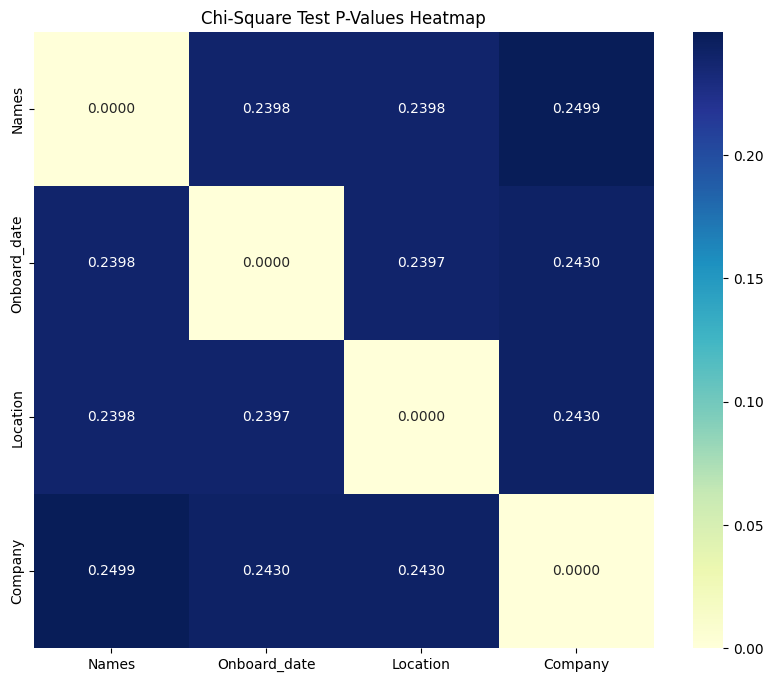

In [49]:
def chi_square_test_for_categorical_columns(df):
    categorical_columns, _ = get_categorical_and_quantitative_columns(df)
    df = pd.read_csv(csv_file_path)
    p_values_matrix = np.zeros((len(categorical_columns), len(categorical_columns)))
    for i in range(len(categorical_columns)):
        for j in range(i + 1, len(categorical_columns)):
            column1 = categorical_columns[i]
            column2 = categorical_columns[j]
            contingency_table = pd.crosstab(df[column1], df[column2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            p_values_matrix[i, j] = p
            p_values_matrix[j, i] = p  # Fill the symmetric position

    plt.figure(figsize=(10, 8))
    sns.heatmap(p_values_matrix, annot=True, fmt=".4f", xticklabels=categorical_columns, yticklabels=categorical_columns, cmap="YlGnBu")
    plt.title("Chi-Square Test P-Values Heatmap")
    plt.show()

chi_square_test_for_categorical_columns(df)

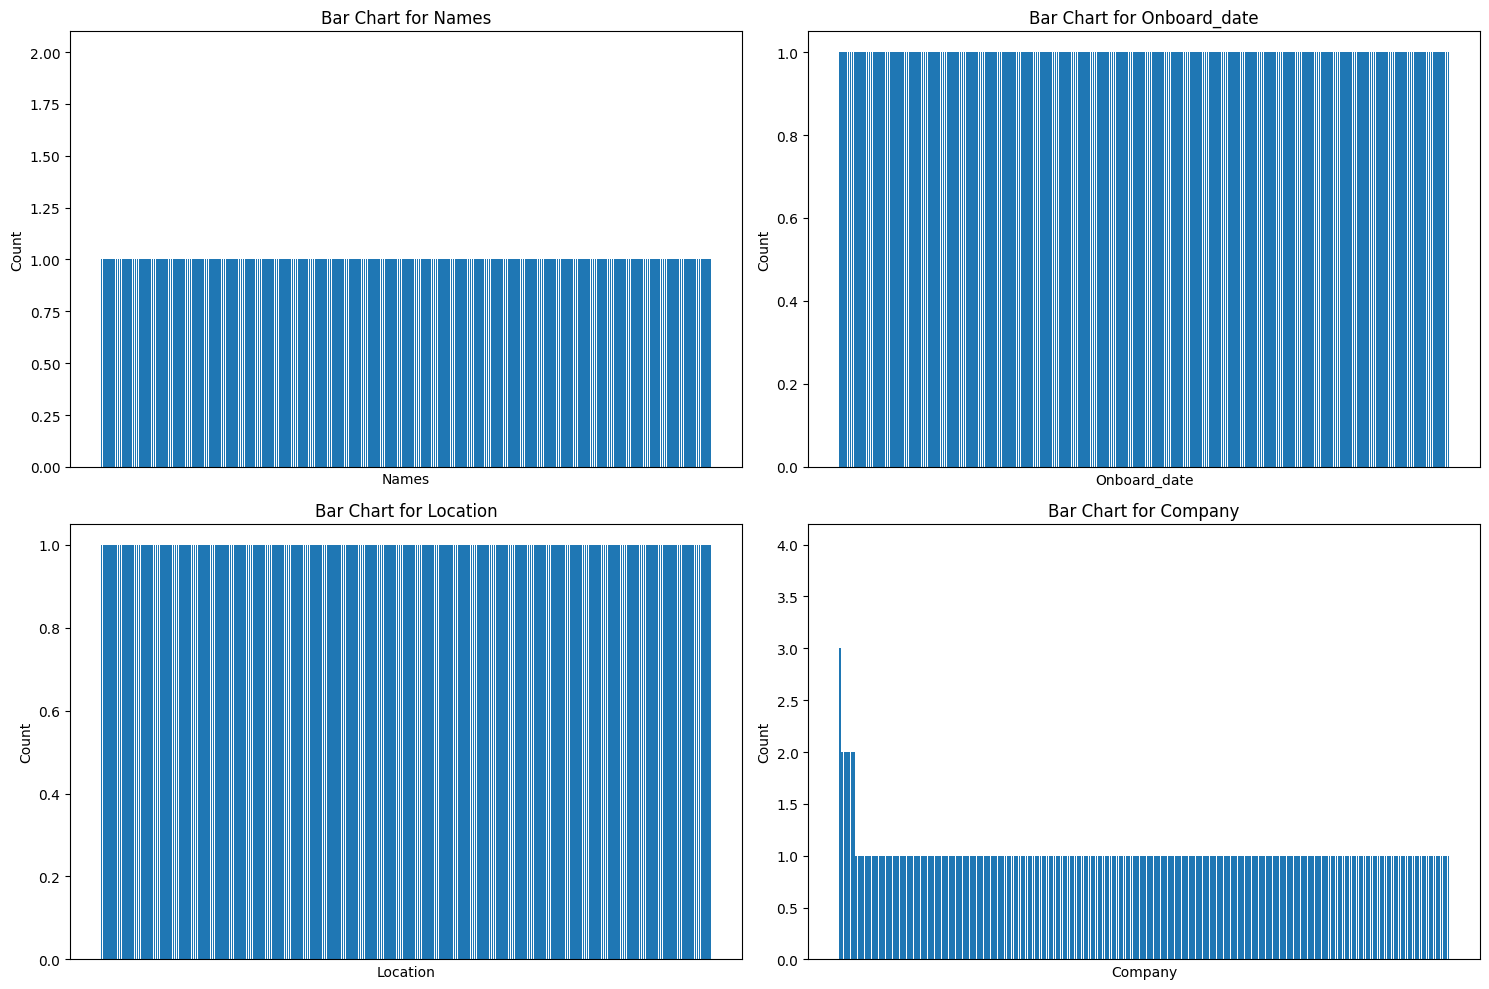

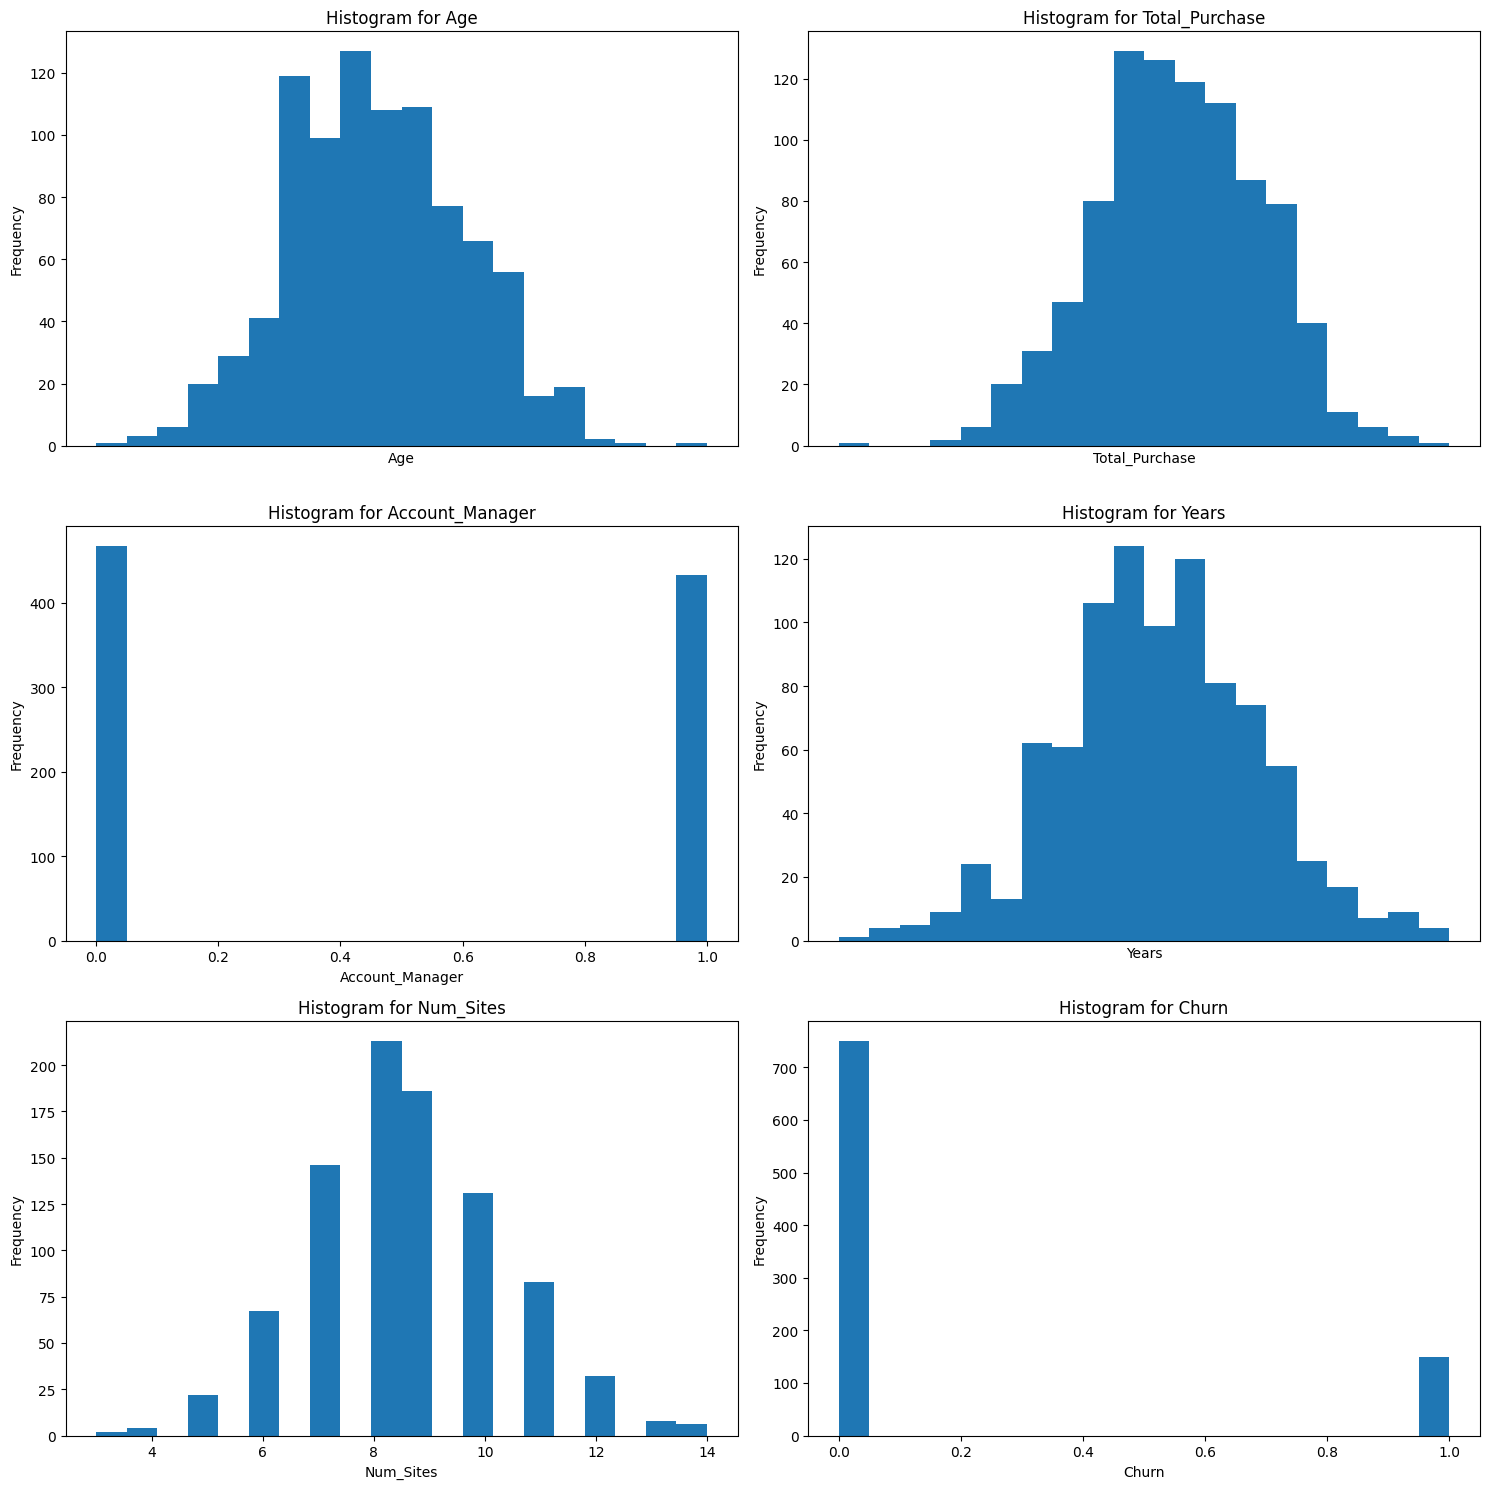

In [50]:
def visualize_categorical_columns(df):
        categorical_columns, _ = get_categorical_and_quantitative_columns(df)
        num_plots = len(categorical_columns)
        num_cols = 2
        num_rows = (num_plots + num_cols - 1) // num_cols
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
        axes = axes.ravel()
        for i, column in enumerate(categorical_columns):
            ax = axes[i]
            value_counts = df[column].value_counts()
            if len(value_counts) > 20:
                ax.bar(value_counts.index, value_counts.values)
                ax.set_xticks([])
                ax.set_xlabel(column)
            else:
                value_counts.plot(kind='bar', ax=ax)
                ax.set_xlabel(column)
            ax.set_title(f'Bar Chart for {column}')
            ax.set_ylabel('Count')
        plt.tight_layout()
        plt.show()

def visualize_quantitative_columns(df):
        _, quantitative_columns = get_categorical_and_quantitative_columns(df)
        num_plots = len(quantitative_columns)
        num_cols = 2
        num_rows = (num_plots + num_cols - 1) // num_cols
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
        axes = axes.ravel()
        for i, column in enumerate(quantitative_columns):
            ax = axes[i]
            if len(df[column].unique()) > 20:
                ax.hist(df[column], bins=20)
                ax.set_xticks([])
                ax.set_xlabel(column)
            else:
                df[column].plot(kind='hist', bins=20, ax=ax)
                ax.set_xlabel(column)
            ax.set_title(f'Histogram for {column}')
            ax.set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()


# Visualize categorical columns
visualize_categorical_columns(df)

# Visualize quantitative columns
visualize_quantitative_columns(df)

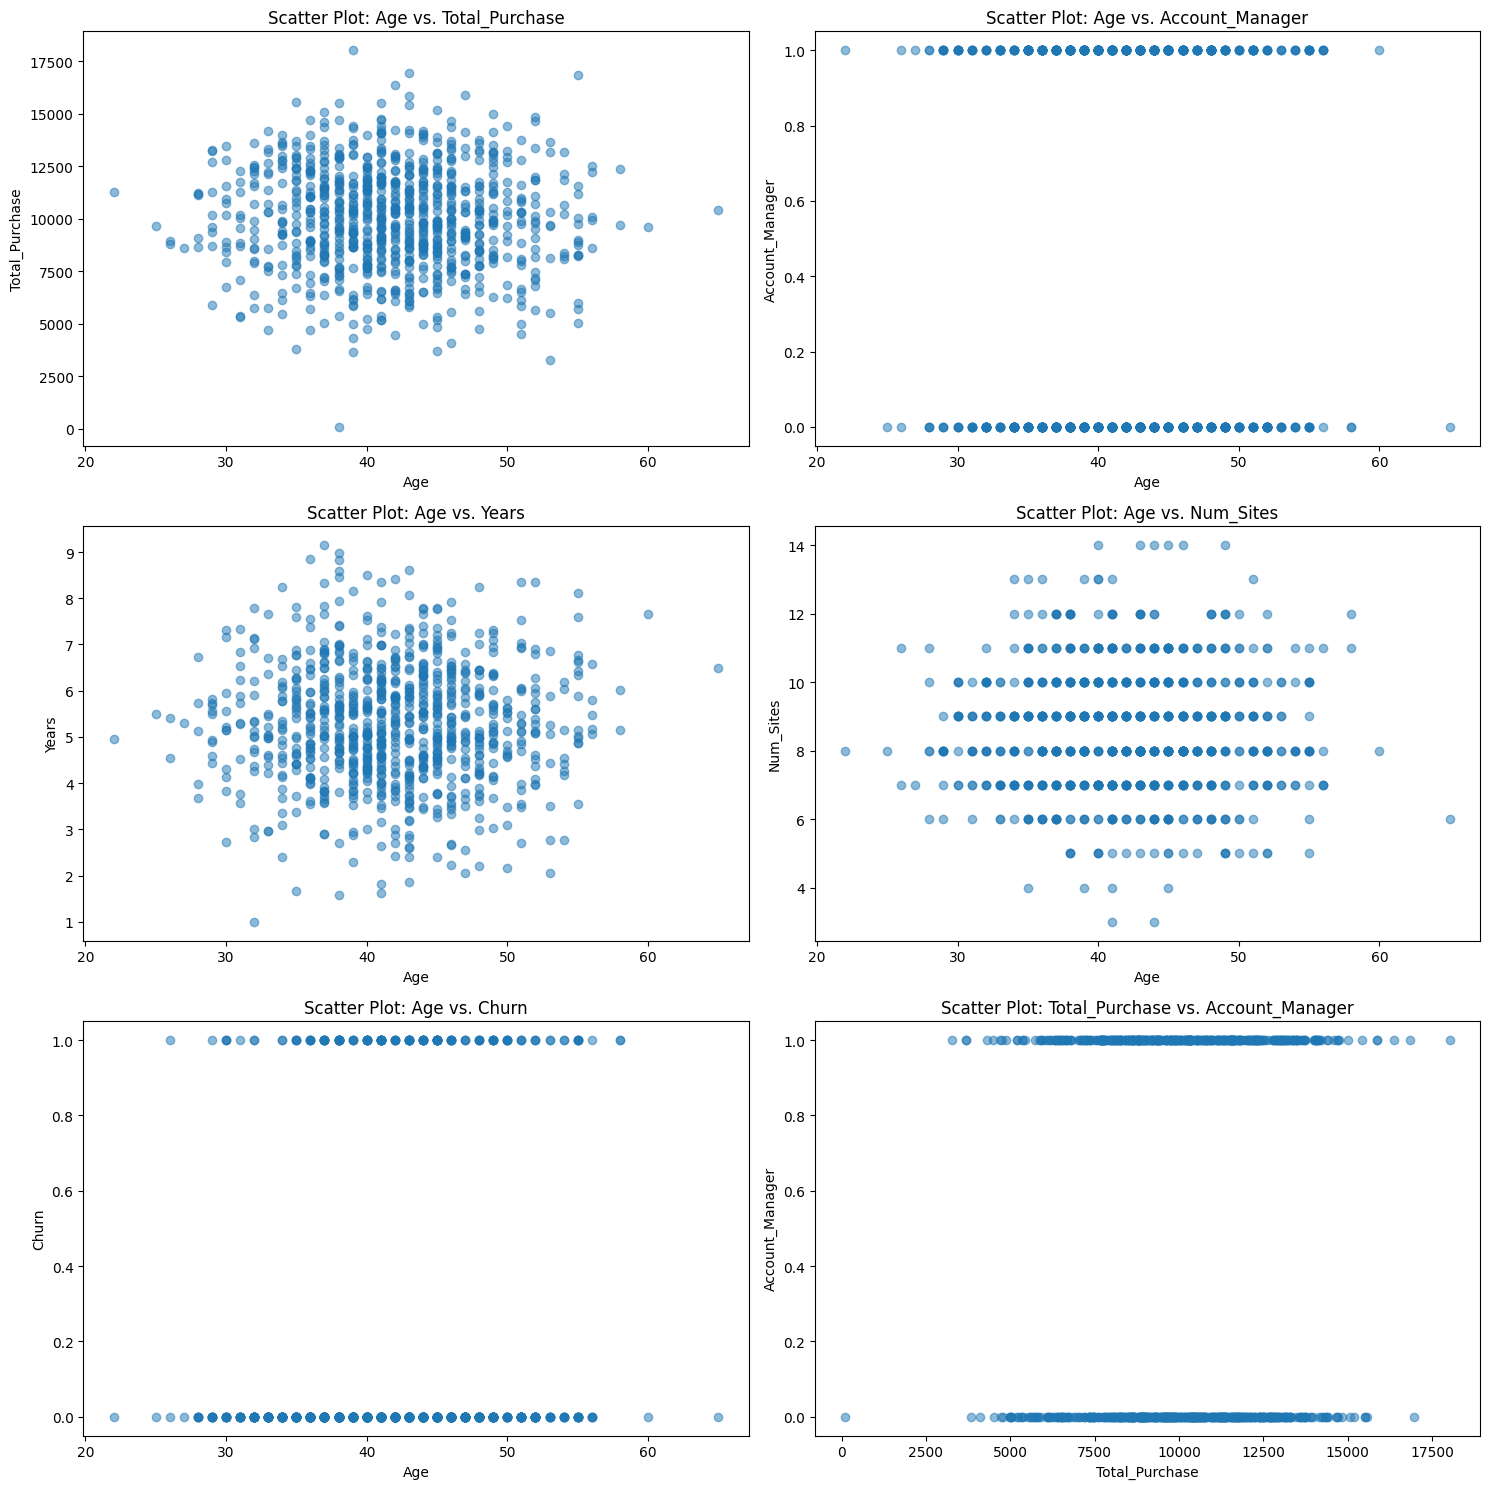

In [51]:
def visualize_scatter_plots(df):
    quantitative_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    num_plots = len(quantitative_columns)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.ravel()
    combinations = list(itertools.combinations(quantitative_columns, 2))

    for i, (x_col, y_col) in enumerate(combinations):
        if i < len(axes):  # Check if i is within the bounds of the axes array
            ax = axes[i]
            ax.scatter(df[x_col], df[y_col], alpha=0.5)
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'Scatter Plot: {x_col} vs. {y_col}')

    # If there are unused subplots, hide them
    for i in range(len(combinations), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_scatter_plots(df)


In [52]:
def encode_categorical_variables(df):
        categorical_columns, _ = get_categorical_and_quantitative_columns(df)
        for column in categorical_columns:
            df[column] = df[column].astype('category').cat.codes
        return df

df = encode_categorical_variables(df)
print("DataFrame after label encoding:")
df

DataFrame after label encoding:


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,127,42.0,11066.80,0,7.22,8.0,634,81,325,1
1,519,41.0,11916.22,0,6.50,11.0,631,487,849,1
2,285,38.0,12884.75,0,6.67,12.0,871,114,499,1
3,698,42.0,8010.76,0,6.71,10.0,691,110,704,1
4,193,37.0,9191.58,0,5.56,9.0,838,607,458,1
...,...,...,...,...,...,...,...,...,...,...
895,687,42.0,12800.82,1,3.62,8.0,181,750,221,0
896,663,52.0,9893.92,0,6.91,7.0,266,674,590,0
897,41,45.0,12056.18,0,5.46,4.0,706,895,680,0
898,473,51.0,6517.93,1,5.47,10.0,541,402,648,0


In [53]:
def robust_scale_dataframe(df, target):
    _, numerical_columns = get_categorical_and_quantitative_columns(df)
    if target in numerical_columns:
        numerical_columns.remove(target)
    scaler = RobustScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    return df

In [54]:
df=robust_scale_dataframe(df, target)

In [55]:
def calculate_iqr_and_identify_outliers(df):
        categorical_columns, quantitative_columns = get_categorical_and_quantitative_columns(df)
        outliers = {}
        for column in quantitative_columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers

In [56]:
outliers = calculate_iqr_and_identify_outliers(df)
print(outliers)

{'Names': Empty DataFrame
Columns: [Names, Age, Total_Purchase, Account_Manager, Years, Num_Sites, Onboard_date, Location, Company, Churn]
Index: [], 'Age':         Names    Age  Total_Purchase  Account_Manager     Years  Num_Sites  \
247  0.357860  2.875        0.117877              0.0  0.774096  -0.666667   
596  0.953177  2.250       -0.130197              1.0  1.466867   0.000000   
653 -0.313266 -2.125       -0.114570              0.0  0.165663   0.000000   
807  0.072464 -2.500        0.370370              1.0 -0.153614   0.000000   

     Onboard_date  Location   Company  Churn  
247      0.319244 -0.352614 -0.875706      0  
596      0.314794  0.744160  0.712994      0  
653     -1.000000  0.986652 -0.685876      0  
807      0.205784 -0.428254  0.154802      0  , 'Total_Purchase':         Names    Age  Total_Purchase  Account_Manager     Years  Num_Sites  \
41  -0.181717  1.625        2.081859              1.0  0.870482   0.000000   
371  0.050167  1.375       -2.078733      

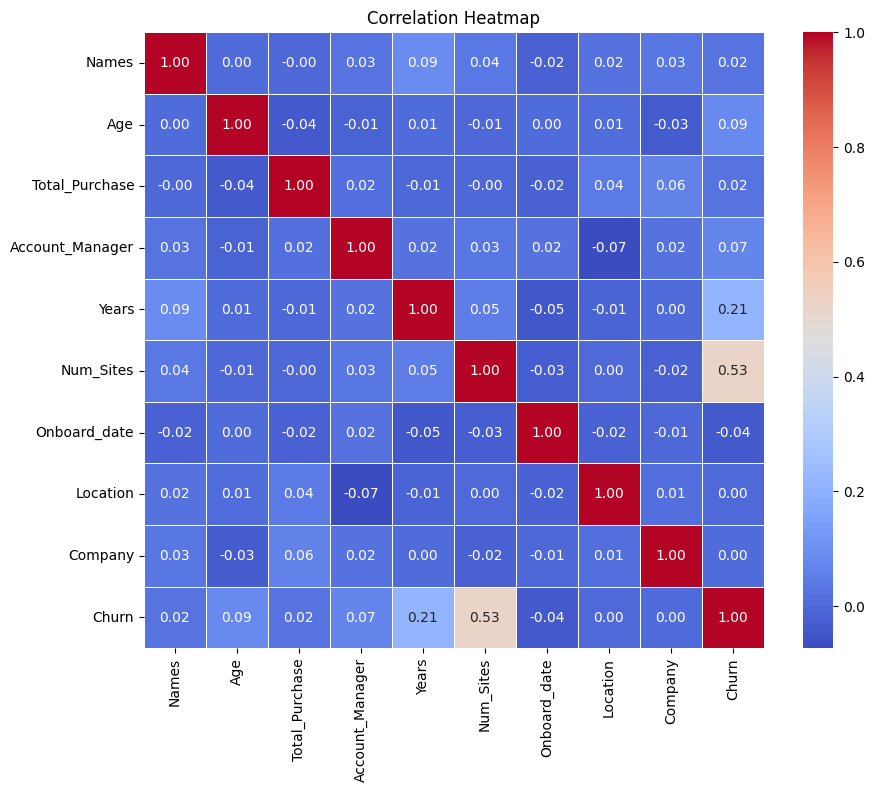

In [57]:
def plot_correlation_heatmap(df):
        correlation_matrix = df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()

plot_correlation_heatmap(df)

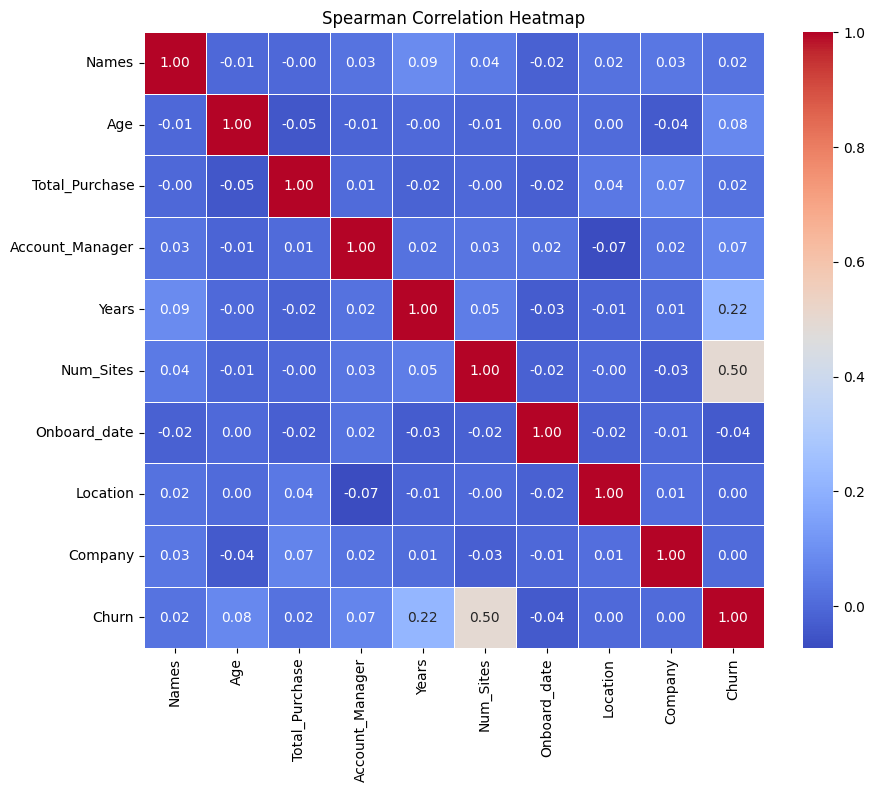

In [58]:
def plot_spearman_correlation_heatmap(df):
    correlation_matrix = df.corr(method='spearman')
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Spearman Correlation Heatmap")
    plt.show()

plot_spearman_correlation_heatmap(df)

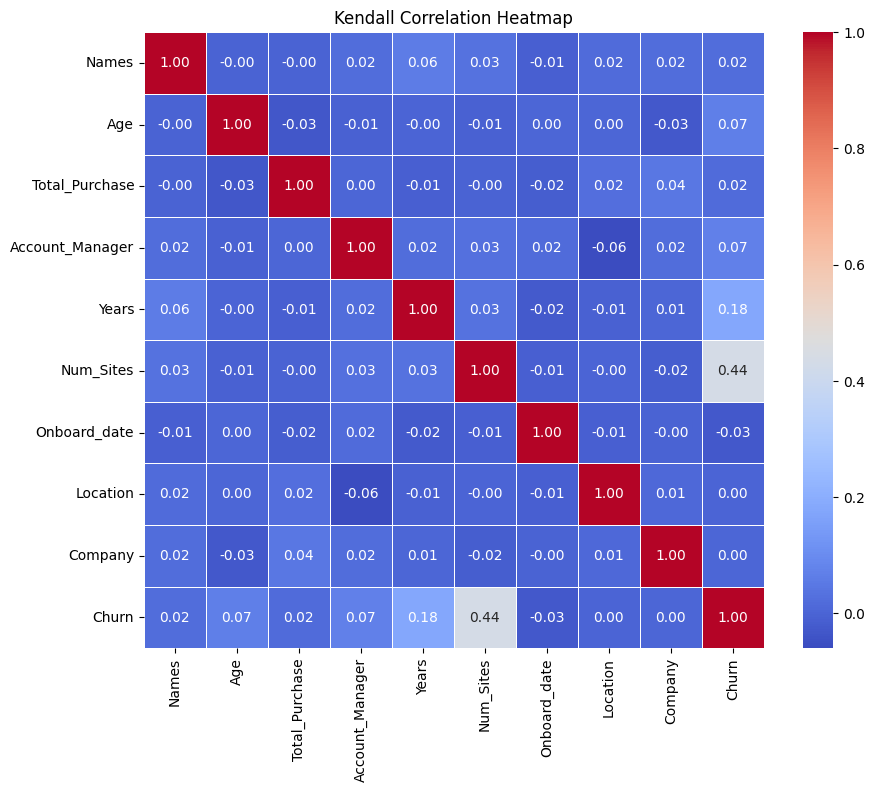

In [59]:
def plot_kendall_correlation_heatmap(df):
    correlation_matrix = df.corr(method='kendall')
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Kendall Correlation Heatmap")
    plt.show()

plot_kendall_correlation_heatmap(df)

In [60]:
def create_final_df_and_save_to_json(csv_file_path):
    json_data = {}

    df = read_csv_with_encoding(csv_file_path, encoding='latin-1')
    #json_data['read_csv_with_encoding'] = df.to_dict(orient='records')

    df = clean_column_names(df)
    #json_data['clean_column_names'] = df.to_dict(orient='records')

    df = remove_duplicate_rows(df)
    #json_data['remove_duplicate_rows'] = df.to_dict(orient='records')

    df = handle_missing_values(df)
    #json_data['handle_missing_values'] = df.to_dict(orient='records')

    head=read_and_get_first_5_rows(df)
    json_data['head']=head.to_dict()

    length=get_dataframe_length(df)
    json_data['length']=length

    # info_df=info(df)
    # json_data['info_df']=info_df.to_dict()

    # chi_sq= chi_square_test_for_categorical_columns(df)
    # json_data['chi_sq']=chi_sq.to_dict()

    categorical_description = get_categorical_description(df)
    json_data['get_categorical_description'] = categorical_description.to_dict()

    categorical_columns, quantitative_columns = get_categorical_and_quantitative_columns(df)
    json_data['get_categorical_and_quantitative_columns'] = {
        'categorical_columns': categorical_columns,
        'quantitative_columns': quantitative_columns
    }

    df = encode_categorical_variables(df)
    #json_data['encode_categorical_variables'] = df.to_dict(orient='records')

    df = robust_scale_dataframe(df, target)
    #json_data['robust_scale_dataframe'] = df.to_dict(orient='records')

    df_description = get_dataframe_description(df)
    json_data['get_dataframe_description'] = df_description.to_dict()

    missing_values_count = get_missing_values_count(df)
    json_data['get_missing_values_count'] = missing_values_count.to_dict()

    outliers = calculate_iqr_and_identify_outliers(df)
    json_data['calculate_iqr_and_identify_outliers'] = {key: value.to_dict(orient='records') for key, value in outliers.items()}

    json_file_path = 'output.json'
    with open(json_file_path, 'w') as json_file:
        json.dump(json_data, json_file, indent=4)

    return df, json_file_path

final_df, json_path = create_final_df_and_save_to_json(csv_file_path)
print("Final DataFrame:")
print(final_df)

print("JSON file path:", json_path)

Final DataFrame:
        Names    Age  Total_Purchase  Account_Manager     Years  Num_Sites  \
0   -0.716834  0.000        0.312882              0.0  1.207831   0.000000   
1    0.157191 -0.125        0.573203              0.0  0.774096   1.000000   
2   -0.364548 -0.500        0.870026              0.0  0.876506   1.333333   
3    0.556299  0.000       -0.623696              0.0  0.900602   0.666667   
4   -0.569677 -0.625       -0.261813              0.0  0.207831   0.333333   
..        ...    ...             ...              ...       ...        ...   
895  0.531773  0.000        0.844304              1.0 -0.960843   0.000000   
896  0.478261  1.250       -0.046568              0.0  1.021084  -0.333333   
897 -0.908584  0.375        0.616096              0.0  0.147590  -1.333333   
898  0.054627  1.125       -1.081201              1.0  0.153614   0.666667   
899  0.012263 -0.375       -0.223804              1.0 -0.117470   0.666667   

     Onboard_date  Location   Company  Churn  

In [61]:
target = input("Please enter the value for Target variable name: ")
print("You entered:", target)

Please enter the value for Target variable name: Churn
You entered: Churn


In [62]:
def get_final_output(final_df, target):
    X = final_df.drop(target, axis=1)
    y = final_df[target]

    def classification(X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_classifier.fit(X_train, y_train)
        y_pred = rf_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return "The Accuracy is: " , accuracy

    def regression(X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_regressor.fit(X_train, y_train)
        y_pred = rf_regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        return "The MSE is: ",  mse

    def determine_task_type(target):
        y = final_df[target]
        target_dtype = y.dtype
        if pd.api.types.is_numeric_dtype(target_dtype):
            if pd.api.types.is_integer_dtype(target_dtype):
                unique_values = y.unique()
                if len(unique_values) > 10:
                    return "Regression"
                else:
                    return "Classification"
            else:
                return "Regression"
        elif pd.api.types.is_object_dtype(target_dtype) or pd.api.types.is_string_dtype(target_dtype):
            return "Classification"
        else:
            return "Classification"

    task_type = determine_task_type(target)
    if task_type == "Regression":
        return regression(X, y)
    elif task_type == "Classification":
        return classification(X, y)


result = get_final_output(final_df, target)
print("Final Output:", result)

Final Output: ('The Accuracy is: ', 0.8777777777777778)
